# Intro to Python

These notebooks have been made using Python 3. There are a lot of packages available that can be installed in various different ways using a terminal or anaconda navigator if you have installed it. Details will depend on the setup on your machine, please consult google for details. Here is a link for package installation in Anaconda documentation:
https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/

There are loads of free Python 3 intros on the web.

Some tricks (keyboard shortcuts) for jupyter notebooks:
- **alt+enter** adds a new cell
- **shift+enter** runs current cell
- **ctrl+?** comments out code (#)
- **esc+M** change cell to markdown 
- **esc+Y** change cell to code

In [1]:
# Load some packages (if you get an error, you need to install the package in the terminal)
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as lg
import time
import seaborn as sns

Useful things:

In [5]:
print(np.zeros(4)) #array of ones
np.zeros(4) #array of zeros
np.ones(shape=(3,3)) # matrix of ones of dimension 3x3
print(np.zeros(shape = (3,3))) #matrix of zeros

np.linspace(0,1, 20) #start, stop, number (start and stop included)
print(np.arange(0,1, 0.1)) #start, stop, step (stop not included)
print(type(np.arange(0,1,0.1)))
np.random.rand() #uniform random (0,1)
np.random.rand(4) #array of uniform random
np.random.rand(3,3) #matrix of random uniform

np.random.randint(2,8, 5) # start, stop, array_length
np.random.randn() #standard normal

[0. 0. 0. 0.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
<class 'numpy.ndarray'>


-0.9403207752562334

## Linear Algebra (hand-out 1)

Consider matrix $
M = \begin{pmatrix}
2 & 5 & 7 \\
6 & 1 & 8 \\
4 & 3 & 2
\end{pmatrix} \in R^{3 \times 3}
$

In [7]:
M=np.array([[2,0,7],[6,1,0], [4,3,2]]) #define a matrix 


print('shape = ',np.shape(M)) # we can return the shape of M

print('Indexing is from zero, M[0,0] =', M[0,0])

print('3rd column (M[:,2]) = ', M[:,2])

print(M)

shape =  (3, 3)
Indexing is from zero, M[0,0] = 2
3rd column (M[:,2]) =  [7 0 2]
[[2 0 7]
 [6 1 0]
 [4 3 2]]


In [12]:
print('Element wise multiplication \n', M*M)

print('\nMatrix multiplication \n', np.dot(M,M))

print('\n Powers of matrix (M^3) \n', np.linalg.matrix_power(M, 3) )

print('\n Matrix Exponential (exp(M)) \n', lg.expm(M))

Element wise multiplication 
 [[ 4  0 49]
 [36  1  0]
 [16  9  4]]

Matrix multiplication 
 [[32 21 28]
 [18  1 42]
 [34  9 32]]

 Powers of matrix (M^3) 
 [[302 105 280]
 [210 127 210]
 [250 105 302]]

 Matrix Exponential (exp(M)) 
 [[2499.21692082 1027.074999   2624.62584049]
 [1956.22929214  803.74537346 2054.14999799]
 [2380.13619371  978.11464607 2499.21692082]]


In [14]:
print('Transpose \n', M.T )

print('\n Determinant \n', np.linalg.det(M))

print('\n Trace \n', np.trace(M))

print('\n Inverse \n', np.linalg.inv(M))


Transpose 
 [[2 6 4]
 [0 1 3]
 [7 0 2]]

 Determinant 
 102.00000000000004

 Trace 
 5

 Inverse 
 [[ 0.01960784  0.20588235 -0.06862745]
 [-0.11764706 -0.23529412  0.41176471]
 [ 0.1372549  -0.05882353  0.01960784]]


In [15]:
np.linalg.eig(M)

(array([ 8.66604238+0.j       , -1.83302119+2.9000193j,
        -1.83302119-2.9000193j]),
 array([[-0.63001133+0.j        , -0.36517799+0.37381408j,
         -0.36517799-0.37381408j],
        [-0.49309249+0.j        ,  0.7734033 +0.j        ,
          0.7734033 -0.j        ],
        [-0.5999546 +0.j        ,  0.04509527-0.35598007j,
          0.04509527+0.35598007j]]))

In [16]:
evals, evecs = np.linalg.eig(M)

print('Eigenvalues \n', evals)

print('\n Corresponding eigenvectors \n', evecs)


Eigenvalues 
 [ 8.66604238+0.j        -1.83302119+2.9000193j -1.83302119-2.9000193j]

 Corresponding eigenvectors 
 [[-0.63001133+0.j         -0.36517799+0.37381408j -0.36517799-0.37381408j]
 [-0.49309249+0.j          0.7734033 +0.j          0.7734033 -0.j        ]
 [-0.5999546 +0.j          0.04509527-0.35598007j  0.04509527+0.35598007j]]


Consider $Ax = b,$ 


For $
A = \begin{pmatrix}
2 & 5 \\
6 & 1 
\end{pmatrix} \in R^{2 \times 2}, \ b = \begin{pmatrix} 1 \\ 1 \end{pmatrix} \in \mathbb{R}^{2 \times 1}
$

In [17]:
A = [[2,5], [6,1]]
b = [1,1]
x = np.linalg.solve(A,b)
print('Solution is \n', x)

print('\n Check solution, Ax = \n', np.dot(A,x))

Solution is 
 [0.14285714 0.14285714]

 Check solution, Ax = 
 [1. 1.]


# Notes: Gershgorin disk theorem

Given a matrix $A \in \mathbb{R}^{n \times n}$, the Gershgorin disk theorem stats that all eigenvalues lie in at least one Gershogorin disk,

$D_i$ is a disk centered on $a_{i,i}$ with radius $R_i = \sum_{j \neq i} |a_{i,j}|$.

In [18]:
def plot_circle(center,radius): # Function to plot a circle
    x=np.linspace(-1,1,500)
    x*=radius
    x+=center
    y=np.sqrt(radius**2-(x-center)**2)
    plt.plot(x,y,'r-',lw=3)
    plt.plot(x,-1*y,'r-',lw=3)

Consider a random walk, with 5 states with periodic BC

In [23]:
p=0.3
q=0.7
A=np.array([[0,p,0,0,q],[q,0,p,0,0],[0,q,0,p,0],[0,0,q,0,p],[p,0,0,q,0]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)

[[0.  0.3 0.  0.  0.7]
 [0.7 0.  0.3 0.  0. ]
 [0.  0.7 0.  0.3 0. ]
 [0.  0.  0.7 0.  0.3]
 [0.3 0.  0.  0.7 0. ]]


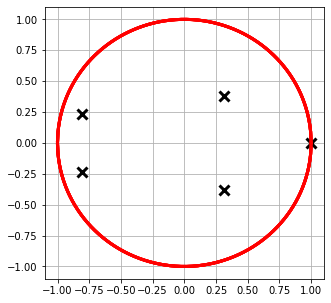

In [24]:
plt.figure(figsize = (5,5))
for i in range(N):
    plot_circle(centers[i],radii[i]) # Plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) # Plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()



In [6]:
print(evals)
print ('\n eigenvectors', evecs.T)

[-0.80901699+0.2351141j  -0.80901699-0.2351141j   1.00000000+0.j
  0.30901699+0.38042261j  0.30901699-0.38042261j]

 eigenvectors [[-0.1381966-0.4253254j  -0.1381966+0.4253254j   0.3618034-0.26286556j
  -0.4472136+0.j          0.3618034+0.26286556j]
 [-0.1381966+0.4253254j  -0.1381966-0.4253254j   0.3618034+0.26286556j
  -0.4472136-0.j          0.3618034-0.26286556j]
 [-0.4472136+0.j         -0.4472136+0.j         -0.4472136+0.j
  -0.4472136+0.j         -0.4472136+0.j        ]
 [ 0.1381966-0.4253254j  -0.3618034-0.26286556j -0.3618034+0.26286556j
   0.1381966+0.4253254j   0.4472136+0.j        ]
 [ 0.1381966+0.4253254j  -0.3618034+0.26286556j -0.3618034-0.26286556j
   0.1381966-0.4253254j   0.4472136-0.j        ]]


Lazy random walk with 4 states:

In [56]:
eps=0.1
p=0.3
q=1-p-eps
A=np.array([[eps,p,0,q],[q,eps,p,0],[0,q,eps,p],[p,0,q,eps]])
print(A)

centers=[]
radii=[]

N=A.shape[0]
for i in range(N):
    centers.append(A[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=A[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(A)
#evals,evecs=np.linalg.eig(np.linalg.matrix_power(A, 4))

[[0.1 0.3 0.  0.6]
 [0.6 0.1 0.3 0. ]
 [0.  0.6 0.1 0.3]
 [0.3 0.  0.6 0.1]]


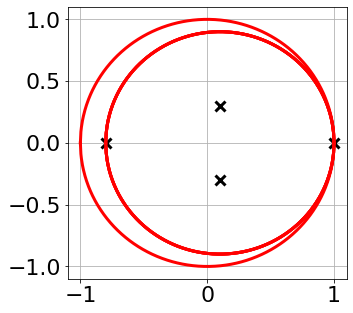

In [57]:
plt.figure(figsize = (5,5))
plot_circle(0,1)
for i in range(N):
    plot_circle(centers[i],radii[i]) # plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) #plot evalue i
lim=1.1
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()

# Random Walks


## Simple Random Walk

**Defintion Simple Random Walk** - Let $X_1, ... \in \{-1,1\}$ be iid r.v with $\mathbb{P}[X_i = 1] = p, \mathbb{P}[X_i = -1] = q=1-p$. Then the sequence $Y_0, Y_1,...$ defined as $Y_0 = 0$ and $Y_n = \sum_{k=1}^{n} X_k$ is the simple random walk on $\mathbb{Z}$.

Recall,

$\mathbb{E}[Y_n] = \mathbb{E}\left[ \sum_{k=1}^{n} x_k \right] = \sum_{k=1}^{n} = n(2p-1)$ 

and 

$ var[Y_n] = var\left[ \sum_{k=1}^{n} x_k \right] = \sum_{k=1}^{n} var[x_k] = 4np(1-p)$

We will run N simulations of a random walk and calculate numerically the average and deviations over the replications and compare this to the theoretical solution.

In [37]:
def SRW(p, tmax, N):
    q = 1-p
    X = np.random.rand(N,tmax)
    X[X<p] = 1
    X[X!=1] = -1
    Y = np.zeros((N,tmax))
    for i in range(0, N):
        X[i][0] = 0 #start at zero
        Y[i,:] = np.cumsum(X[i,:])
    return X, Y

In [46]:
tmax = 100
N_sim = 50
p = 0.7
S = SRW(p, tmax, N_sim)

### Plots

In [39]:
### This may produce warning signs (comment out if needed)
font = {'family' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

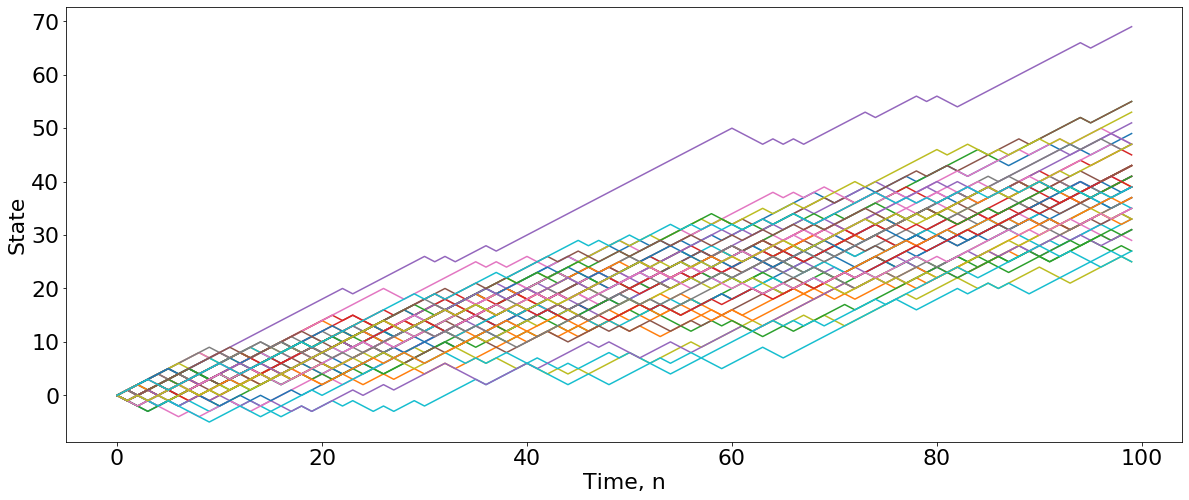

In [47]:
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
plt.figure(figsize = (20,8))
for k in range(0, N_sim):
    plt.plot(range(tmax), S[1][k,:])
    plt.xlabel('Time, n')
    plt.ylabel('State')

In [48]:
average = np.mean(S[1], axis = 0)
std = np.std(S[1], axis = 0)
theoretical_average = [n*(2*p-1) for n in range(tmax)]
theoretical_std = [np.sqrt(4*n*p*(1-p)) for n in range(tmax)]

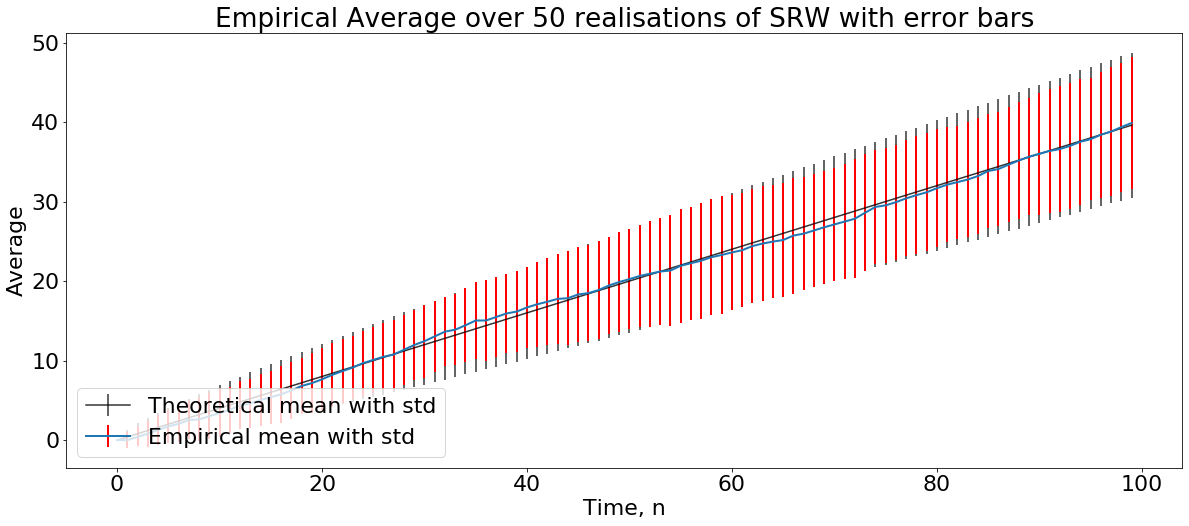

In [49]:
plt.figure(figsize = (20,8))
plt.errorbar(range(tmax), theoretical_average, yerr = theoretical_std, color = 'k', alpha = 0.8,  label = "Theoretical mean with std")
plt.errorbar(range(tmax), average, yerr = std, ecolor = 'red',  linewidth = 2, label = "Empirical mean with std")
plt.title("Empirical Average over {} realisations of SRW with error bars".format(N_sim))
plt.xlabel("Time, n")
plt.ylabel("Average")
plt.legend(loc = 'lower left')
plt.savefig('empirical.pdf')

### Empirical Distribution of SRW

In [52]:
tmax = 100
N_sim = 200
p = 0.5
SS = SRW(p, tmax, N_sim)

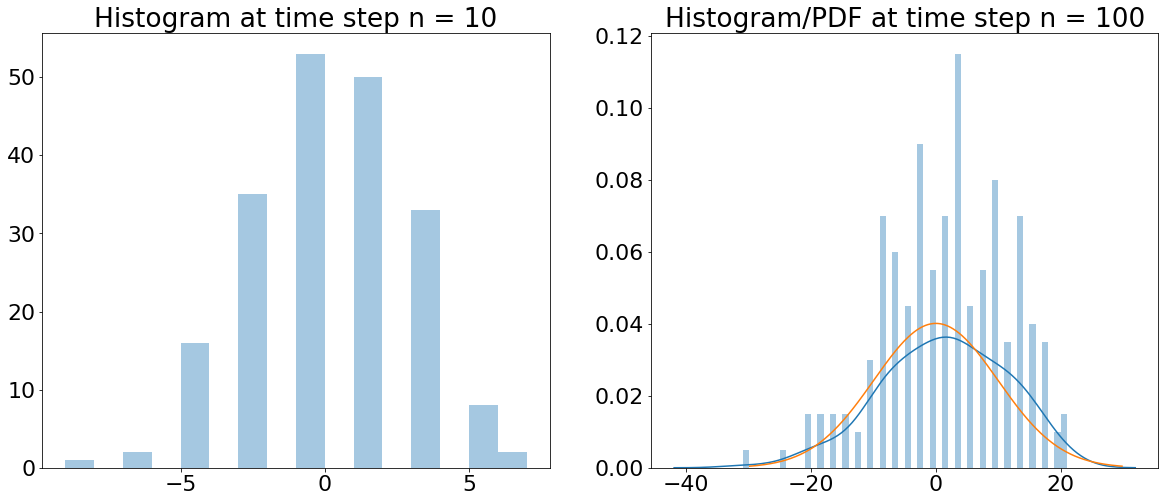

In [55]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
nbi = int(max(SS[1][:,9])-min(SS[1][:,9]))
sns.distplot(SS[1][:,9],bins = nbi, kde = False)
#sns.distplot(SS[1][:,9], kde = False)
plt.title('Histogram at time step n = 10')

plt.subplot(1,2,2)
plt.title('Histogram/PDF at time step n = 100')
nbi = int(max(SS[1][:,99])-min(SS[1][:,99]))
sns.distplot(SS[1][:,99],bins = nbi)

mean = (2*p-1)*99; variance = 4*p*(1-p)*99;
x = np.arange(mean-3*np.sqrt(variance),mean+3*np.sqrt(variance),.01)
f = np.exp(-np.square(x-mean)/(2*variance))/(np.sqrt(2*np.pi*variance))
plt.plot(x,f)